In [1]:
%pylab inline
import torch
from torch import nn
from torch import optim

from sklearn import datasets

from tqdm import tqdm_notebook as tqdm

import matplotlib.animation as animation
from IPython.display import HTML

Populating the interactive namespace from numpy and matplotlib


In [2]:
figsize(10, 8)

In [3]:
CLASSES = 5

In [19]:
dataset = datasets.make_blobs(n_samples=1000, centers=CLASSES)

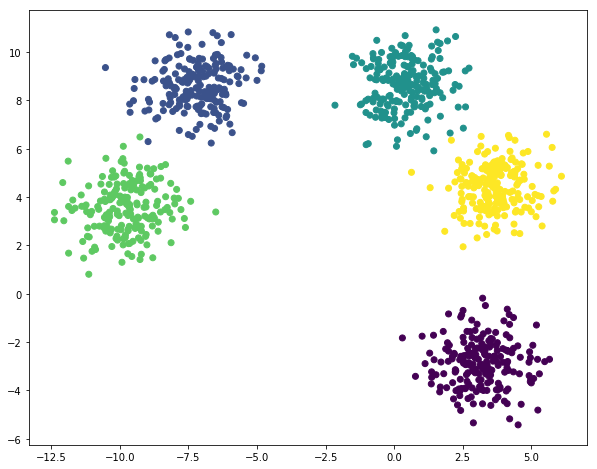

In [20]:
scatter(dataset[0][:,0], dataset[0][:,1], c=dataset[1]);

In [21]:
data = torch.FloatTensor(dataset[0])
target = torch.LongTensor(dataset[1])

In [22]:
data

tensor([[  4.9160,  -2.8331],
        [-10.8082,   3.6101],
        [ -0.0831,   9.8306],
        ...,
        [ -9.3463,   3.1726],
        [  4.4558,   3.4486],
        [  1.0060,   8.1054]])

In [23]:
data.size()

torch.Size([1000, 2])

In [44]:
class RNA(nn.Module):
    def __init__(self, inpt, hidden, out):
        super(RNA, self).__init__()
        
        self.l1 = nn.Linear(inpt, hidden)
        self.l2 = nn.Linear(hidden, hidden)
        self.l3 = nn.Linear(hidden, out)
    
    def forward(self, x):
        x = torch.tanh(self.l1(x))
        x = torch.tanh(self.l2(x))
        x = torch.softmax(self.l3(x), dim=1)
        return x

In [59]:
model = RNA(2, 64, CLASSES)

In [60]:
model

RNA(
  (l1): Linear(in_features=2, out_features=64, bias=True)
  (l2): Linear(in_features=64, out_features=64, bias=True)
  (l3): Linear(in_features=64, out_features=5, bias=True)
)

In [61]:
area = []
for i in linspace(-15, 16, 100):
    for j in linspace(-15, 16, 100):
        area.append([i, j])
        
test = torch.FloatTensor(area)
test_np = array(test)

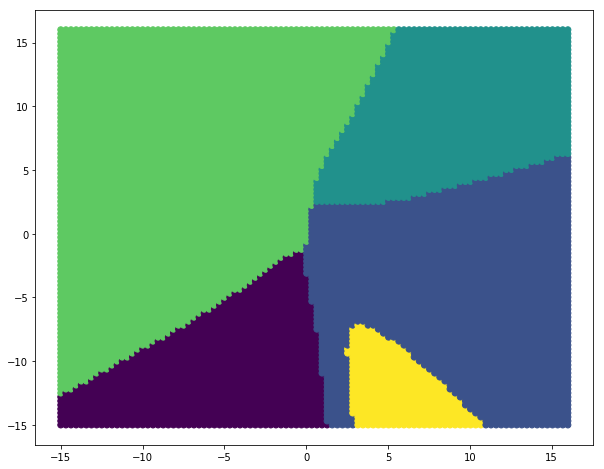

In [62]:
result = [i.argmax() for i in model(test)]
plt.scatter(test_np[:, 0], test_np[:, 1], c=result)

In [63]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

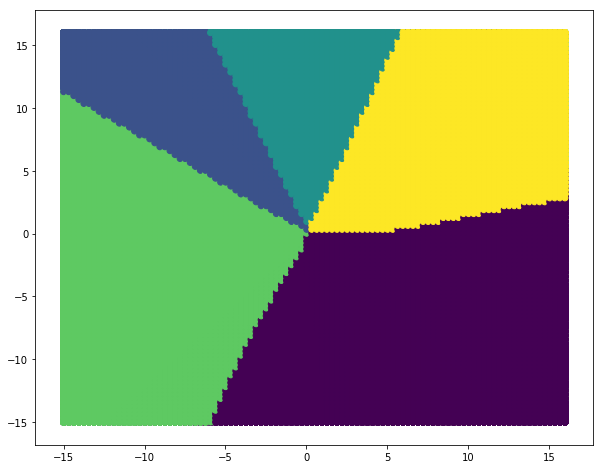

In [64]:
fig = plt.figure()
views = []
for epoch in tqdm(range(50)):
    result = [i.argmax() for i in model(test)]
    p = plt.scatter(test_np[:, 0], test_np[:, 1], c=result,  animated=True)
    views.append([p])
    
    optimizer.zero_grad()
    
    logit = model(data)
    loss = criterion(logit, target)
    loss.backward()
    optimizer.step()
    
    

result = [i.argmax() for i in model(test)]
p = plt.scatter(test_np[:, 0], test_np[:, 1], c=result,  animated=True)
views.append([p]);

In [65]:
ani = animation.ArtistAnimation(fig, views, interval=100, blit=True)

HTML(ani.to_jshtml())

para salvar a animação:

```python
ani.save("out.mp4")

ani.save('out.gif',writer='imagemagick')
```